# PyQAlloy Basic Usage Examples

Welcome to a minimal Jupyter notebook that shows how to use the PyQAlloy package. It assumes you are using the default settings, i.e. the data collection you are running on is the current static image of the `CURATED` ULTERA HEA dataset used for abnormal data detection located in the `ULTERA_internal` MongoDB database. As of March 2023, that collection is `CURATED_Dec2022`.

Note, that to access it, you will need to create a `credentials.json` file in the `pyqalloy` package as described in install instructions in [documentation](https://pyqalloy.readthedocs.io/en/latest/). Alternatively, if you are not able to connect to the ULTERA server, e.g. on offline HPC, you can set up an in-memory MontyDB database (tht mimics MongoDB basic functions) as descibed in [dev/jDummyDatabaseInMemory.ipynb](https://github.com/PhasesResearchLab/PyQAlloy/blob/main/dev/jDummyDatabaseInMemory.ipynb) notebook, you can find in the PyQAlloy GitHub repository, populating it with ULTERA Data from Zenodo repository at [doi.org/10.5281/zenodo.7566415](https://doi.org/10.5281/zenodo.7566415) or with your data conforming to the ULTERA schema standards.

## Single Composition Scope

Set up the sC (single Composition) Analyzer Object


In [1]:
from pyqalloy.curation import analysis
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
sC = analysis.SingleCompositionAnalyzer()

Connected to the CURATED_Dec2022 in ULTERA_internal with 6073 data points detected.


Scan through all the compositions, looking for the ones that are close to 100 but not exactly 100. Request up to 10 results and then stop.

In [3]:
sC.scanCompositionsAround100(resultLimit=10, printOnFly=True)

DOI: 10.1016/j.msea.2017.04.111
F:   Cr19 Fe19 Co19 Ni37 Cu4 Al4
PF:  Cr18.6 Fe18.6 Co18.6 Ni36.3 Cu3.9 Al3.9
Raw:  Al4Co19Cr19Cu4Fe19Ni37
RF:  Cr4.75 Fe4.75 Co4.75 Ni9.25 Cu1 Al1
[19.0, 19.0, 19.0, 37.0, 4.0, 4.0]
-->  102.0

DOI: 10.3390/ma12071136
F:   Li38 Ca1 Mg48 Al15 Si1
PF:  Li36.9 Ca1 Mg46.6 Al14.6 Si1
Raw:  Al15Li38Mg48Ca1 Si1
RF:  Li38 Ca1 Mg48 Al15 Si1
[38.0, 1.0, 48.0, 15.0, 1.0]
-->  103.0

DOI: 10.1016/j.msea.2012.04.067  --> F9
F:   Hf1.4 Zr0.007 Ti0.4 Ta3.3 W9.4 Mo0.5 Cr8.1 Co9.3 Ni61.5 Al5.7 B0.017 C0.07
PF:  Hf1.4 Zr0 Ti0.4 Ta3.3 W9.4 Mo0.5 Cr8.1 Co9.3 Ni61.7 Al5.7 B0 C0.1
Raw:  Ni61.5 W9.4 Co9.3 Cr8.1 Al5.7 Ta3.3 Hf1.4 Ti0.4 Mo0.5 C0.07 B0.017 Zr0.007
RF:  Hf2.8 Zr0.01 Ti0.8 Ta6.6 W18.8 Mo1 Cr16.2 Co18.6 Ni123 Al11.4 B0.03 C0.14
[1.4, 0.007, 0.4, 3.3, 9.4, 0.5, 8.1, 9.3, 61.5, 5.7, 0.017, 0.07]
-->  99.694

DOI: 10.1016/j.ijfatigue.2018.08.029  --> T6
F:   Ti86.2 V3.15 Al10.2
PF:  Ti86.6 V3.2 Al10.2
Raw:  Ti86.2 Al10.2 V3.15
RF:  Ti27.37 V1 Al3.24
[86.2, 3.15, 10.2]

Re-initialize the sC object and run agin with custom settings (uncertainty=1, i.e. +/-1% passed as close enough to 100%). THere are quite a few you can modify to your needs.

In [4]:
sC = analysis.SingleCompositionAnalyzer()
sC.scanCompositionsAround100(resultLimit=10, printOnFly=True, uncertainty=1)

Connected to the CURATED_Dec2022 in ULTERA_internal with 6073 data points detected.
DOI: 10.1016/j.msea.2017.04.111
F:   Cr19 Fe19 Co19 Ni37 Cu4 Al4
PF:  Cr18.6 Fe18.6 Co18.6 Ni36.3 Cu3.9 Al3.9
Raw:  Al4Co19Cr19Cu4Fe19Ni37
RF:  Cr4.75 Fe4.75 Co4.75 Ni9.25 Cu1 Al1
[19.0, 19.0, 19.0, 37.0, 4.0, 4.0]
-->  102.0

DOI: 10.3390/ma12071136
F:   Li38 Ca1 Mg48 Al15 Si1
PF:  Li36.9 Ca1 Mg46.6 Al14.6 Si1
Raw:  Al15Li38Mg48Ca1 Si1
RF:  Li38 Ca1 Mg48 Al15 Si1
[38.0, 1.0, 48.0, 15.0, 1.0]
-->  103.0

DOI: 10.1016/j.actamat.2016.11.016
F:   Cr16 Fe16 Co16 Ni34.4 Al16
PF:  Cr16.3 Fe16.3 Co16.3 Ni35 Al16.3
Raw:  Al16Co16Cr16Fe16Ni34.4
RF:  Cr1 Fe1 Co1 Ni2.15 Al1
[16.0, 16.0, 16.0, 34.4, 16.0]
-->  98.4

DOI: Liu_1999_ProcessingAndHighTemperature  --> F2
F:   Hf0.9 Mo91
PF:  Hf1 Mo99
Raw:  Mo91 Hf0.9
RF:  Hf1 Mo101.11
[0.9, 91.0]
-->  91.9

DOI: 10.1134/S2070205120040231  --> T2
F:   Ta1 Nb0.103
PF:  Ta90.7 Nb9.3
Raw:  TaNb0.103
RF:  Ta9.71 Nb1
[1.0, 0.103]
-->  1.103

DOI: 10.1155/2019/2157592
F:   Ti0

Now, run, but only look at compositions that a specific researcher uploaded by initilizing the sC with a name specified. This time the printOnFly is set to False, so that the results are not printed on the fly, but rather stored in a list.

In [5]:
sC = analysis.SingleCompositionAnalyzer(name='Adam Krajewski')
sC.scanCompositionsAround100(printOnFly=False, resultLimit=10, uncertainty=0.21)

Connected to the CURATED_Dec2022 in ULTERA_internal with 6073 data points detected.


And now, save that list for later analysis!

In [6]:
sC.writeResultsToFile('singleComp_Adam.txt')

## Single DOI

Set up the sDOI (single DOI) Analyzer Object and initialize it with a DOI of interest.

In [7]:
doi = '10.1016/j.jallcom.2008.11.059'
sDOI = analysis.SingleDOIAnalyzer(doi=doi)

Connected to the CURATED_Dec2022 in ULTERA_internal with 6073 data points detected.
********  Analyzer Initialized  ********


Helper function to get all the DOIs that are present in the collection.

In [8]:
doiList = sDOI.get_allDOIs()

Analyze distances between all the compositions in the publication. And print abnormalities.

In [9]:
sDOI.analyze_nnDistances()

In [10]:
sDOI.print_nnDistances()

0.0866    |  0.9524     <-- Ti0.5Al0.5Cr1Fe1Co1Cu0.5Ni1
0.0909    |  1.0        <-- Ti0.5Al0.75Cr1Fe1Co1Cu0.25Ni1
0.0823    |  0.9048     <-- Ti0.5Al0.25Cr1Fe1Co1Cu0.75Ni1
0.0909    |  1.0        <-- Ti0.5Cr1Fe1Co1Cu1Ni1
0.0823    |  0.9048     <-- Ti0.5Al0.25Cr1Fe1Co1Cu0.5Ni1


You can also set the name of the researcher to get the same results, but only for the stusies they contributed to.

In [11]:
sDOI.setName('Zi-Kui')

In [12]:
sDOI.analyze_nnDistances()
sDOI.print_nnDistances()

Skipping 10.1016/j.jallcom.2008.11.059. Specified researcher (Zi-Kui) not present in the group ({'Adam Krajewski'})


In [13]:
sDOI.setName('Adam Krajewski')

In [14]:
sDOI.analyze_nnDistances()
sDOI.print_nnDistances()

0.0866    |  0.9524     <-- Ti0.5Al0.5Cr1Fe1Co1Cu0.5Ni1
0.0909    |  1.0        <-- Ti0.5Al0.75Cr1Fe1Co1Cu0.25Ni1
0.0823    |  0.9048     <-- Ti0.5Al0.25Cr1Fe1Co1Cu0.75Ni1
0.0909    |  1.0        <-- Ti0.5Cr1Fe1Co1Cu1Ni1
0.0823    |  0.9048     <-- Ti0.5Al0.25Cr1Fe1Co1Cu0.5Ni1


In [15]:
sDOI.get_compVecs_2DPCA()

array([[ 0.03246058, -0.00649938],
       [ 0.09674289, -0.0063689 ],
       [-0.03182172, -0.00662987],
       [-0.09610402, -0.00676035],
       [-0.00127773,  0.0262585 ]])

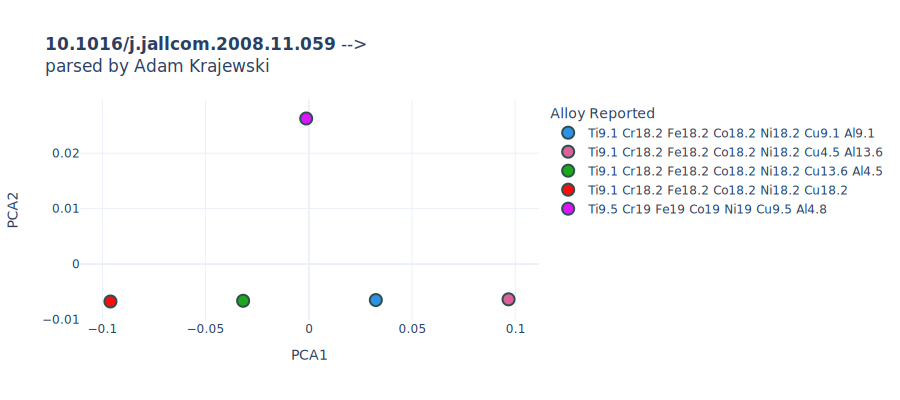

In [16]:
sDOI.analyze_compVecs_2DPCA()

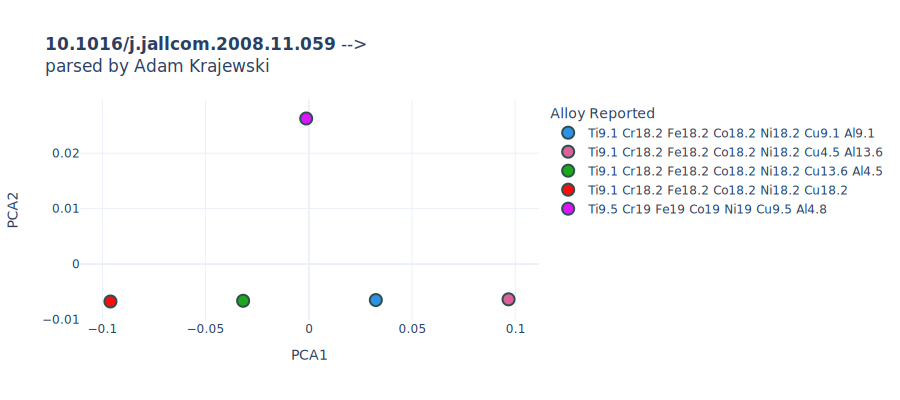

In [17]:
for doi in ['10.1016/j.jallcom.2008.11.059', '10.3390/met9010076', '10.1016/j.scriptamat.2018.10.023', '10.1007/978-1-4684-6066-7', '10.3390/e18050189']:
    sDOI.setDOI(doi)
    sDOI.getCompVecs()
    if len(sDOI.compVecs)>1:
        sDOI.get_compVecs_2DPCA()
        sDOI.analyze_compVecs_2DPCA(showFigure=True)

In [18]:
for doi in doiList[0:10]:
    sDOI.setDOI(doi)
    sDOI.getCompVecs()
    if len(sDOI.compVecs) > 1:
        sDOI.get_compVecs_2DPCA()
        sDOI.analyze_compVecs_2DPCA(showFigure=True)

In [19]:
sDOI = analysis.SingleDOIAnalyzer(doi='', name='Adam Krajewski')
for doi in doiList[0:10]:
    sDOI.setName('Adam Krajewski')
    sDOI.setDOI(doi)
    sDOI.getCompVecs()
    if len(sDOI.compVecs) > 1:
        sDOI.get_compVecs_2DPCA()
        sDOI.analyze_compVecs_2DPCA(showFigure=True)

Connected to the CURATED_Dec2022 in ULTERA_internal with 6073 data points detected.
********  Analyzer Initialized  ********


In [20]:
doi = '10.1016/j.jallcom.2008.11.059'
sDOI = analysis.SingleDOIAnalyzer(doi=doi)
sDOI.setName('Hui Sun')
doiList = sDOI.get_allDOIs()
print(f'{len(doiList)} DOIs to process')

Connected to the CURATED_Dec2022 in ULTERA_internal with 6073 data points detected.
********  Analyzer Initialized  ********
479 DOIs to process


In [21]:
toPrintList = []
for doi in doiList:
    sDOI.setName('Hui Sun')
    sDOI.setDOI(doi)
    sDOI.getCompVecs()
    if len(sDOI.compVecs)>1:
        sDOI.get_compVecs_2DPCA()
        out = sDOI.analyze_compVecs_2DPCA(showFigure=False)
        toPrintList.append(out)
    else:
        toPrintList.append(f'Skipping {doi:<30} Not enough data for PCA (N>=2).')
sDOI.writeManyPlots(toPlotList=toPrintList, workbookPath='SingleDOI_ResultPCA_Hui.xlsx')

## Entire Database

Set up the allD (all Data) Analyzer Object and initialize it

In [22]:
from pyqalloy.curation import analysis

In [23]:
allD = analysis.AllDataAnalyzer()

Connected to the CURATED_Dec2022 in ULTERA_internal with 6073 data points detected.
Updating the list of all unique composition points...
Number of unique formulas found: 1311
Elements Found: {'Mo', 'Fe', 'Si', 'Ir', 'Mg', 'O', 'Ca', 'Zr', 'Nb', 'Ge', 'Be', 'Li', 'Co', 'V', 'Mn', 'B', 'Cr', 'C', 'Ti', 'Ta', 'Sc', 'Ru', 'Zn', 'Hf', 'Cu', 'Y', 'Al', 'Ga', 'Sn', 'Ni', 'Re', 'N', 'S', 'Ag', 'W', 'Pd', 'Nd'}
Done!


In [24]:
allD.getTSNE(perplexity=5)

array([[-46.397068 , -27.267189 ],
       [ -3.2727704,   2.30549  ],
       [-78.12488  ,  16.568735 ],
       ...,
       [ 72.67273  , -11.160606 ],
       [-34.665714 ,  20.281357 ],
       [ 36.46736  ,  20.45136  ]], dtype=float32)

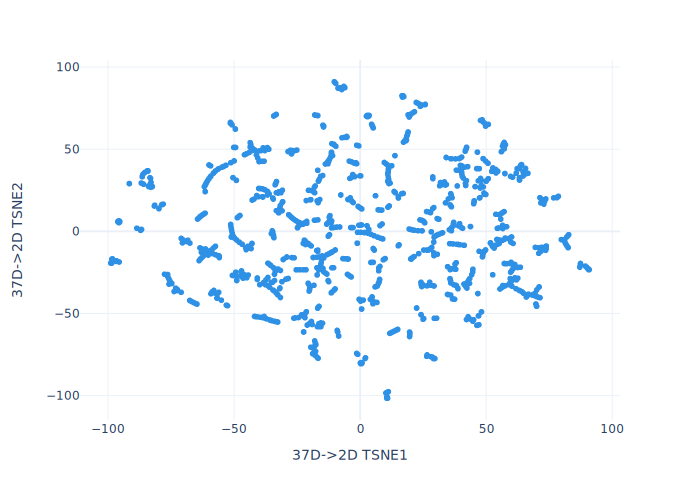

In [25]:
allD.showTSNE()

In [26]:
allD.getDBSCAN(eps=0.075, min_samples=2)

Found 115 clusters and 427 outliers.
Outlier ratio: 32.6%


(array([  0,   1,   2, ...,  -1,   1, 109]), 427)

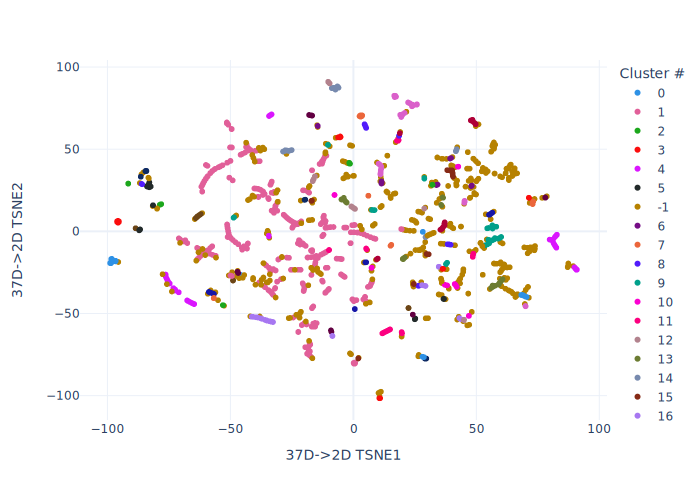

In [27]:
allD.showClustersDBSCAN()

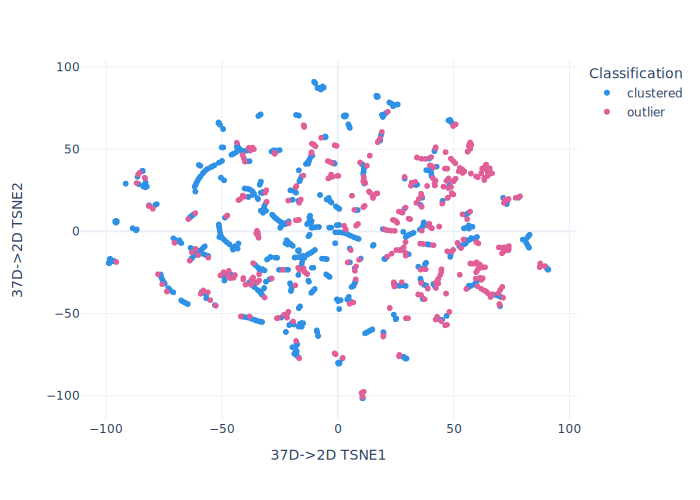

In [28]:
allD.showOutliersDBSCAN()

In [29]:
allD.getDBSCANautoEpsilon(outlierTargetN=17)

Running DBSCAN with eps=1.0...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.975...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.95...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.925...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.9...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.875...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.85...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.825...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.8...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.775...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.75...
Found 1 clusters and 0 outliers.
Outlier ratio: 0.0%
Running DBSCAN with eps=0.725...
Found 1 clusters and 0 outlier

(array([0, 0, 0, ..., 0, 0, 0]), 17)

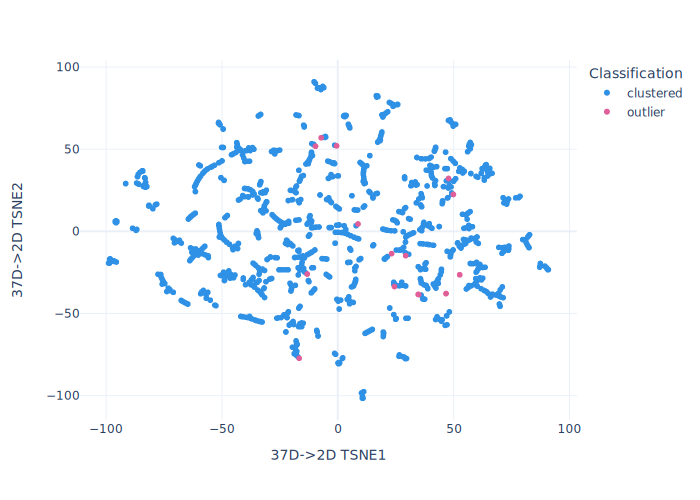

In [30]:
allD.showOutliersDBSCAN()

In [31]:
allD.updateOutliersList()

In [32]:
allD.findOutlierDataSources();

Outlier Nb8 W2.33 Cr1 Co11 Al11   | Nb24 W7 Cr3 Co33 Al33     | Co33W07Al33Nb24Cr03
matched to:  Adam Krajewski       upload from DOI 10.1038/s41467-019-10533-1 

Outlier Zr1 Ta2.13 Ru3.53         | Zr15 Ta32 Ru53            | Ru53 Ta32 Zr15 
matched to:  Marcia Ahn           upload from DOI 10.1016/j.apsusc.2015.06.144 at position T3 

Outlier Be2.25 Zr4.12 Ti1.38 Ni1 Cu1.25 | Be22.5 Zr41.2 Ti13.8 Ni10 Cu12.5 | Zr41.2 Ti13.8 Cu12.5 Ni10 Be22.5
matched to:  Hui Sun              upload from DOI 10.1016/j.scriptamat.2013.05.020 at position T1 

Outlier Hf1 Zr1 Ti1 Ta1 C4        | Hf12.5 Zr12.5 Ti12.5 Ta12.5 C50 | (Zr0.25Hf0.25Ta0.25Ti0.25)C
matched to:  Hui Sun              upload from DOI 10.1007/s11661-020-06034-2 at position P2 

Outlier W1.5 Mo6.33 Co1 Ni1.83 Al6 | W9 Mo38 Co6 Ni11 Al36     | Co6W9Al36Mo38Ni11
matched to:  Adam Krajewski       upload from DOI 10.1038/s41467-019-10533-1 

Outlier Ti1 Nb1 Ag1 Zn1 Al1       | Ti20 Nb20 Ag20 Zn20 Al20  | AgAlNbTiZn
matched to:  Adam Kraj